In [1]:
"""
Importing Libraries
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
"""
Importing the models
"""
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [3]:
pwd

'/Users/shankar'

In [4]:
"""
Reading the column data from the respective .csv files that contains the Text and respective label.
This model works on all kinds of Text data that was labeled properly according to the text. 
We just need to change the name of the file that was given as an input.
"""
df = pd.read_csv("/Users/shankar/Data/Project/Huff Post.csv")  #BBC News Train #Huff Post
df = df[['Text','Category']]
df

,Text,Category
0,Mei-Chun Jau for HuffPost Amanda Painter is th...,CRIME
1,The 2018 FIFA World Cup starts June 14 in Russ...,ENTERTAINMENT
2,Love actually turned to matrimony for Hugh Gra...,ENTERTAINMENT
3,Rep. Adam Schiff (D-Calif.) and fellow Democra...,ENTERTAINMENT
4,The “Dietland” star told host Jimmy Fallon tha...,ENTERTAINMENT
...,...,...
5440,Spain scooped up its first Winter Olympics med...,SPORTS
5441,U.S. figure skater Adam Rippon nailed his rout...,SPORTS
5442,Republicans trotted out the same old meaningle...,COMEDY
5443,Jamaica’s women’s bobsled team will have a sle...,SPORTS


In [5]:
"""
Displaying the labels w.r.t the Text and passing it as an input to 
1. Generate the list to visualize the category count
2. Generate the dictionaries to map 
    a. the label to integer.
    b. the predicicted outcome to the corresponding label.
"""
df['Category']

0               CRIME
1       ENTERTAINMENT
2       ENTERTAINMENT
3       ENTERTAINMENT
4       ENTERTAINMENT
            ...      
5440           SPORTS
5441           SPORTS
5442           COMEDY
5443           SPORTS
5444         POLITICS
Name: Category, Length: 5445, dtype: object

In [6]:
"""
Displaying the categories w.r.t their count
"""
df['category_id'] = df['Category'].factorize()[0]
category_list = df.groupby('Category').category_id.count()
category_list

Category
BLACK VOICES      290
BUSINESS           56
COMEDY            305
CRIME             136
EDUCATION          26
ENTERTAINMENT    1121
IMPACT             55
LATINO VOICES      13
MEDIA             174
POLITICS         2025
QUEER VOICES      290
RELIGION           39
SCIENCE            28
SPORTS            178
TECH               40
TRAVEL             55
WEIRD NEWS        133
WOMEN             140
WORLD NEWS        341
Name: category_id, dtype: int64

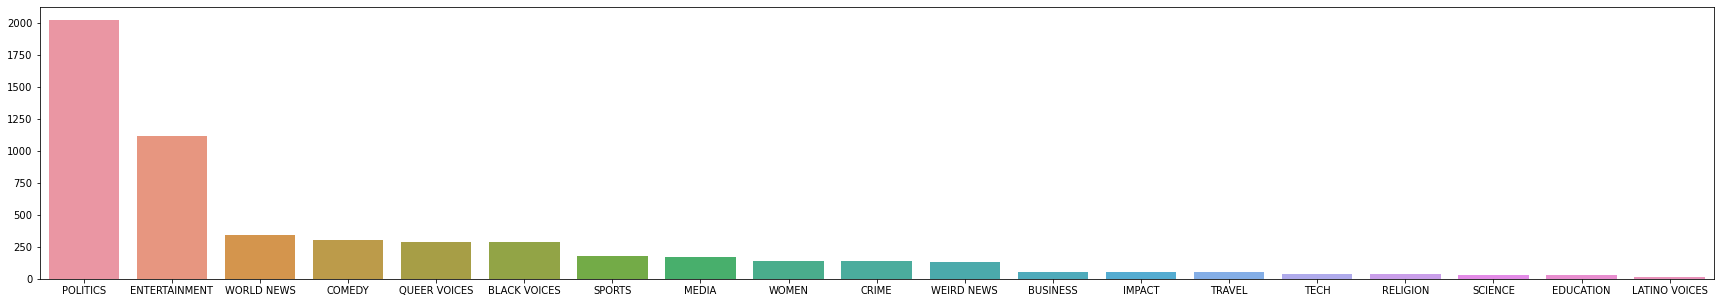

In [7]:
"""
Visualizing the label count
"""
category = df['Category'].value_counts()
plt.figure(figsize=(30, 5))
sns.barplot(category.index, category.values);

In [8]:
"""
Using term frequency and inverse document frequency to generate the features w.r.t the stopwords present in the text.
"""
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2),
                        stop_words='english')

In [9]:
"""
Generating the features
"""
features = tfidf.fit_transform(df.Text).toarray()
features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04155581, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [10]:
"""
Generating the labels for the respective text
"""
labels = df.category_id
labels

0        0
1        1
2        1
3        1
4        1
        ..
5440    10
5441    10
5442     8
5443    10
5444     4
Name: category_id, Length: 5445, dtype: int64

In [11]:
"""
Generating a list of available categories to pass this an input to generate dictionary
"""
list = df['Category'].values
list

array(['CRIME', 'ENTERTAINMENT', 'ENTERTAINMENT', ..., 'COMEDY', 'SPORTS',
       'POLITICS'], dtype=object)

In [12]:
"""
Populating the 2 dictionaries
    a. the label to integer.
    b. the predicicted outcome to the corresponding label.
"""
category_to_id_dict = {}
id_to_category_dict = {}

i=0
for word in list:
      if not word in category_to_id_dict:
            category_to_id_dict.update({word:i})
            id_to_category_dict.update({i:word})
            i=i+1
category_to_id_dict

{'CRIME': 0,
 'ENTERTAINMENT': 1,
 'WORLD NEWS': 2,
 'IMPACT': 3,
 'POLITICS': 4,
 'WEIRD NEWS': 5,
 'BLACK VOICES': 6,
 'WOMEN': 7,
 'COMEDY': 8,
 'QUEER VOICES': 9,
 'SPORTS': 10,
 'BUSINESS': 11,
 'TRAVEL': 12,
 'MEDIA': 13,
 'TECH': 14,
 'RELIGION': 15,
 'SCIENCE': 16,
 'LATINO VOICES': 17,
 'EDUCATION': 18}

In [13]:
id_to_category_dict

{0: 'CRIME',
 1: 'ENTERTAINMENT',
 2: 'WORLD NEWS',
 3: 'IMPACT',
 4: 'POLITICS',
 5: 'WEIRD NEWS',
 6: 'BLACK VOICES',
 7: 'WOMEN',
 8: 'COMEDY',
 9: 'QUEER VOICES',
 10: 'SPORTS',
 11: 'BUSINESS',
 12: 'TRAVEL',
 13: 'MEDIA',
 14: 'TECH',
 15: 'RELIGION',
 16: 'SCIENCE',
 17: 'LATINO VOICES',
 18: 'EDUCATION'}

In [14]:
"""
Modeling the RandomForestClassifier
"""
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [15]:
"""
Spliting the input data into training and testing data
"""
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

In [16]:
"""
Modeling
"""
model = RandomForestClassifier()

In [17]:
"""
Fitting the model
"""
model.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
"""
predicting the testing data
"""
y_pred = model.predict(X_test)
y_pred

array([ 1,  4,  4,  4,  1,  1,  4,  1,  1,  4,  4,  4,  1,  4,  4,  4,  4,
        1,  4,  4,  1,  4,  4,  4, 13,  1,  2,  1,  4,  1,  4,  4,  4,  1,
        4,  4,  1,  4,  4,  2,  1,  1,  4,  1,  4,  1,  4,  1,  4,  1,  1,
        1,  1,  4,  4,  4,  4,  1,  2,  1,  1, 10,  4,  4,  1,  4,  4,  1,
        1,  1,  1,  8,  1,  1,  1,  4,  4,  4,  4,  1,  4,  1,  1,  4,  4,
        4, 10,  1,  4,  4,  4,  1,  9,  1,  4,  1,  4,  4,  8,  1,  1,  1,
        4,  2,  4,  1,  4,  4,  1,  4,  4,  4,  4,  1,  4,  4,  4,  1,  1,
        4,  1,  4,  1,  4, 10,  4,  4,  1,  6,  4,  4,  4, 10,  4,  4,  1,
        4,  1,  1,  1,  4,  6,  1,  4,  4, 10, 10,  4,  4,  4,  4,  4,  2,
        1,  4,  4,  0,  2,  4,  4,  4,  4,  4,  4,  1,  4,  4,  1,  1,  4,
        4,  1,  5,  1,  4,  1,  1,  4,  4,  4,  1,  4,  4,  1,  4,  4,  4,
        0,  4, 10,  1,  4,  1,  4,  4,  1,  1,  4,  4,  4,  1,  4,  4,  8,
        9,  1,  4,  4,  1,  4,  8,  4,  4,  1,  4,  1,  4,  4,  4,  8,  4,
        1,  4,  4,  4,  1

In [19]:
"""
Evaluating the accuracy of the model
"""
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.653211009174312

In [20]:
"""
Selecting a block of text to predict it's category
"""
text = df.at[800,"Text"]
text

"A Pennsylvania nurse has been arrested and charged with involuntary manslaughter, neglect and falsifying documents in the death of the father of former White House national security adviser H.R. McMaster.\r\n\r\nChristann Shyvin Gainey, 30, was taken into custody on Thursday after being accused of falsely claiming to have performed a series of required medical examinations on 84-year-old Herbert R. McMaster Sr. after he fell and hit his head at a senior living facility in Philadelphia, authorities said.\r\n\r\nThe morning after the April 12 fall at Cathedral Village in Upper Roxborough, McMaster was found dead in a wheelchair. His cause of death was determined to be blunt impact head trauma with a contributing factor of untreated pooling of blood outside his brain, said Pennsylvania Attorney General Josh Shapiro, citing the findings of the Philadelphia chief medical examiner.\r\n\r\nAnadolu Agency via Getty Images The father of former White House national security adviser H.R. McMaste

In [21]:
"""
Generating the features
"""
test_features = tfidf.transform([text])

In [22]:
"""
Predicting the label
"""
prediction = model.predict(test_features)

In [23]:
"""
Printing the label
"""
for i in range(len(prediction)):
    print(id_to_category_dict[prediction[i]])

CRIME


In [24]:
"""
Forming a list of model to pass as an input and check performance of each model w.r.t another
"""
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    KNeighborsClassifier(n_neighbors=3),
    MultinomialNB(),
    LogisticRegression(random_state=0)
]

In [25]:
"""
Calculating the cross-validation score for each model
"""
entries = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=4)
    for i, accuracy in enumerate(accuracies):
        entries.append((model_name, i, accuracy))

In [26]:
"""
Populating the entries into a Data Frame
"""
entries
cv_df = pd.DataFrame(entries, columns=['model_name', 'Cross-Validation-Set', 'accuracy'])
cv_df

,model_name,Cross-Validation-Set,accuracy
0,RandomForestClassifier,0,0.372981
1,RandomForestClassifier,1,0.379133
2,RandomForestClassifier,2,0.372520
3,RandomForestClassifier,3,0.374724
4,KNeighborsClassifier,0,0.674743
5,KNeighborsClassifier,1,0.728141
6,KNeighborsClassifier,2,0.703159
7,KNeighborsClassifier,3,0.704629
8,MultinomialNB,0,0.556535
9,MultinomialNB,1,0.538575


<AxesSubplot:xlabel='model_name', ylabel='accuracy'>

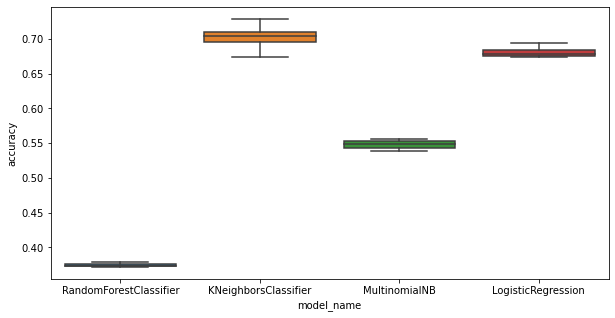

In [27]:
"""
Plotting the results of model (vs) cross_validation_accuracy
"""
plt.figure(figsize=(10, 5))
sns.boxplot('model_name', 'accuracy', data=cv_df)